In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [256]:
df = pd.read_csv("ToyotaCorolla.csv", encoding='latin1', index_col=0)
df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [257]:
df.drop(columns=['Model'], inplace=True)
df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
4,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
5,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   Mfg_Month         1436 non-null   int64 
 3   Mfg_Year          1436 non-null   int64 
 4   KM                1436 non-null   int64 
 5   Fuel_Type         1436 non-null   object
 6   HP                1436 non-null   int64 
 7   Met_Color         1436 non-null   int64 
 8   Color             1436 non-null   object
 9   Automatic         1436 non-null   int64 
 10  cc                1436 non-null   int64 
 11  Doors             1436 non-null   int64 
 12  Cylinders         1436 non-null   int64 
 13  Gears             1436 non-null   int64 
 14  Quarterly_Tax     1436 non-null   int64 
 15  Weight            1436 non-null   int64 
 16  Mfr_Guarantee     1436 non-null   int64 
 17  BOVAG_Guarante

In [259]:
df.describe()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [260]:
df.isnull().sum()

Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [261]:
print(df.corr())

                     Price  Age_08_04  Mfg_Month  Mfg_Year        KM  \
Price             1.000000  -0.876590  -0.018138  0.885159 -0.569960   
Age_08_04        -0.876590   1.000000  -0.123255 -0.983661  0.505672   
Mfg_Month        -0.018138  -0.123255   1.000000 -0.057416 -0.020630   
Mfg_Year          0.885159  -0.983661  -0.057416  1.000000 -0.504974   
KM               -0.569960   0.505672  -0.020630 -0.504974  1.000000   
HP                0.314990  -0.156622  -0.039312  0.164697 -0.333538   
Met_Color         0.108905  -0.108150   0.030266  0.103310 -0.080503   
Automatic         0.033081   0.031717   0.009146 -0.033567 -0.081854   
cc                0.126389  -0.098084   0.037387  0.091892  0.102683   
Doors             0.185326  -0.148359  -0.012069  0.151442 -0.036197   
Cylinders              NaN        NaN        NaN       NaN       NaN   
Gears             0.063104  -0.005364  -0.013063  0.007766  0.015023   
Quarterly_Tax     0.219197  -0.198431   0.031373  0.193934  0.27

C:\Users\amalp\AppData\Local\Temp\ipykernel_22084\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [262]:
df.drop(columns=['Mfg_Month', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'Airbag_1', 'Tow_Bar', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Airbag_2'], inplace=True)
df.columns

Index(['Price', 'Age_08_04', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Color',
       'Cylinders', 'Weight', 'ABS', 'Airco', 'Automatic_airco',
       'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows'],
      dtype='object')

C:\Users\amalp\AppData\Local\Temp\ipykernel_22084\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

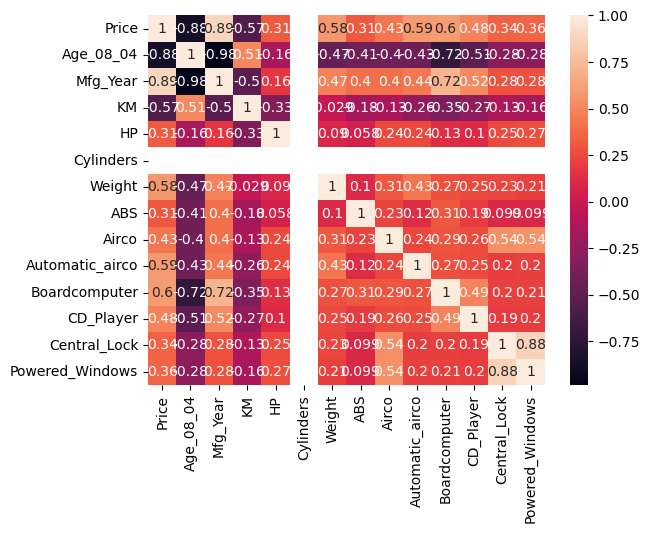

In [263]:
sns.heatmap(df.corr(),annot=True)

In [264]:
for i in df.columns:
    print({i:df[i].unique()})

{'Price': array([13500, 13750, 13950, 14950, 12950, 16900, 18600, 21500, 20950,
       19950, 19600, 22500, 22000, 22750, 17950, 16750, 16950, 15950,
       16250, 17495, 15750, 15500, 14750, 19000, 15800, 21950, 20500,
       13250, 15250, 18950, 15999, 16500, 18750, 22250, 12995, 18450,
       16895, 14900, 17250, 15450, 16650, 17450, 16450, 18900, 18990,
       18500, 19450, 18800, 32500, 31000, 31275, 24950, 22950, 24990,
       17900, 19250, 16350, 21750, 15850, 23000, 19900, 23950, 24500,
       17200, 19500, 16868, 19750, 20750, 17650, 17795, 18245, 23750,
       18700, 21125,  6950,  9500, 11950,  7750,  4350,  4750, 11750,
       11900,  9950, 11495, 11250, 10500, 10450, 11500, 12500, 10950,
       11450, 11790, 12450, 11690, 12750, 11925, 12900, 11650, 10850,
        9940, 13450, 12495, 12000, 11480, 14990, 12850, 11700, 11895,
       13875, 12295, 13995,  9900, 11990, 10750, 11695, 11000, 12400,
       12200, 12695, 14350, 10250,  6500,  6400,  7000,  8900,  8500,
        89

In [265]:
cat_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
cat_col

['Fuel_Type', 'Color']

In [266]:
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature : ", col)
    print("Mapping : ", le_name_mapping)

Feature :  Fuel_Type
Mapping :  {'CNG': 0, 'Diesel': 1, 'Petrol': 2}
Feature :  Color
Mapping :  {'Beige': 0, 'Black': 1, 'Blue': 2, 'Green': 3, 'Grey': 4, 'Red': 5, 'Silver': 6, 'Violet': 7, 'White': 8, 'Yellow': 9}


In [267]:
np.log(df)

c:\Users\amalp\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Color,Cylinders,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows
Id,,,,,,,,,,,,,,,,
1,9.510445,3.135494,7.601902,10.757605,0.000000,4.499810,0.693147,1.386294,7.060476,0.0,-inf,-inf,0.0,-inf,0.0,0.0
2,9.528794,3.135494,7.601902,11.197351,0.000000,4.499810,1.791759,1.386294,7.060476,0.0,0.0,-inf,0.0,0.0,0.0,-inf
3,9.543235,3.178054,7.601902,10.638520,0.000000,4.499810,0.693147,1.386294,7.060476,0.0,-inf,-inf,0.0,-inf,-inf,-inf
4,9.612467,3.258097,7.601902,10.778956,0.000000,4.499810,0.000000,1.386294,7.060476,0.0,-inf,-inf,0.0,-inf,-inf,-inf
5,9.528794,3.401197,7.601902,10.558414,0.000000,4.499810,0.000000,1.386294,7.064759,0.0,0.0,-inf,0.0,-inf,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,8.922658,4.234107,7.599902,9.930324,0.693147,4.454347,0.693147,1.386294,6.932448,0.0,0.0,-inf,-inf,-inf,0.0,0.0
1439,9.291459,4.276666,7.599902,9.852194,0.693147,4.454347,1.386294,1.386294,6.922644,0.0,-inf,-inf,-inf,-inf,-inf,-inf
1440,9.047821,4.262680,7.599902,9.741909,0.693147,4.454347,0.693147,1.386294,6.922644,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [268]:
np.exp(df)

c:\Users\amalp\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Color,Cylinders,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows
Id,,,,,,,,,,,,,,,,
1,inf,9.744803e+09,inf,inf,2.718282,1.220403e+39,7.389056,54.59815,inf,2.718282,1.000000,1.0,2.718282,1.000000,2.718282,2.718282
2,inf,9.744803e+09,inf,inf,2.718282,1.220403e+39,403.428793,54.59815,inf,2.718282,2.718282,1.0,2.718282,2.718282,2.718282,1.000000
3,inf,2.648912e+10,inf,inf,2.718282,1.220403e+39,7.389056,54.59815,inf,2.718282,1.000000,1.0,2.718282,1.000000,1.000000,1.000000
4,inf,1.957296e+11,inf,inf,2.718282,1.220403e+39,2.718282,54.59815,inf,2.718282,1.000000,1.0,2.718282,1.000000,1.000000,1.000000
5,inf,1.068647e+13,inf,inf,2.718282,1.220403e+39,2.718282,54.59815,inf,2.718282,2.718282,1.0,2.718282,1.000000,2.718282,2.718282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,inf,9.253782e+29,inf,inf,7.389056,2.235247e+37,7.389056,54.59815,inf,2.718282,2.718282,1.0,1.000000,1.000000,2.718282,2.718282
1439,inf,1.858672e+31,inf,inf,7.389056,2.235247e+37,54.598150,54.59815,inf,2.718282,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
1440,inf,6.837671e+30,inf,inf,7.389056,2.235247e+37,7.389056,54.59815,inf,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [269]:
df_sqrt = df.copy()
for column in df_sqrt.columns:
    if column != 'Price':
        df_sqrt[column] = np.sqrt(df_sqrt[column])
df_sqrt

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Color,Cylinders,Weight,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows
Id,,,,,,,,,,,,,,,,
1,13500,4.795832,44.743715,216.762543,1.000000,9.486833,1.414214,2.0,34.132096,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,13750,4.795832,44.743715,270.068510,1.000000,9.486833,2.449490,2.0,34.132096,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,13950,4.898979,44.743715,204.232710,1.000000,9.486833,1.414214,2.0,34.132096,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,14950,5.099020,44.743715,219.089023,1.000000,9.486833,1.000000,2.0,34.132096,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,13750,5.477226,44.743715,196.214169,1.000000,9.486833,1.000000,2.0,34.205263,1.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,7500,8.306624,44.698993,143.331783,1.414214,9.273618,1.414214,2.0,32.015621,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1439,10845,8.485281,44.698993,137.840488,1.414214,9.273618,2.000000,2.0,31.859065,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1440,8500,8.426150,44.698993,130.445391,1.414214,9.273618,1.414214,2.0,31.859065,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
X = df[['Age_08_04', 'Mfg_Year', 'KM',
       'Cylinders', 'Weight' ,'Automatic_airco',
       'Boardcomputer','Fuel_Type','ABS','HP','Central_Lock','Powered_Windows','CD_Player','Airco','Color']]
Y = df[['Price']]

X_sqrt = df_sqrt[['Age_08_04', 'Mfg_Year', 'KM',
       'Cylinders', 'Weight', 'Automatic_airco',
       'Boardcomputer','Fuel_Type','ABS','HP','Central_Lock','Powered_Windows','CD_Player','Airco','Color']]
Y_sqrt = df_sqrt[['Price']]

In [271]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-1.77196633,  1.54179615, -0.57469494, ..., -0.5290155 ,
        -1.01685512, -0.89025807],
       [-1.77196633,  1.54179615,  0.11745379, ...,  1.89030379,
         0.98342427,  1.46192333],
       [-1.71818412,  1.54179615, -0.71538641, ..., -0.5290155 ,
        -1.01685512, -0.89025807],
       ...,
       [ 0.80957948, -1.05529391, -1.37403589, ..., -0.5290155 ,
        -1.01685512, -0.89025807],
       [ 0.75579727, -1.05529391, -1.37670303, ..., -0.5290155 ,
        -1.01685512,  0.28583263],
       [ 1.0784905 , -1.05529391, -1.82784925, ..., -0.5290155 ,
        -1.01685512, -0.30221272]])

In [272]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
x_sqrt_train,x_sqrt_test,y_sqrt_train,y_sqrt_test = train_test_split(X_sqrt,Y_sqrt,test_size=0.2,random_state=10)

In [273]:
model = LinearRegression()
model_sqrt = LinearRegression()

In [274]:
model.fit(x_train,y_train)
model_sqrt.fit(x_sqrt_train,y_sqrt_train)

LinearRegression()

In [275]:
y_pred = model.predict(x_test)
y_pred_sqrt = model_sqrt.predict(x_sqrt_test)

In [276]:
print("No Transformation : ",model.score(x_train,y_train)*100)
print("Sqrt Transformation : ", model_sqrt.score(x_sqrt_train,y_sqrt_train)*100)

No Transformation :  89.65179465646445
Sqrt Transformation :  89.9074052144114


In [277]:
r2 = r2_score(y_test,y_pred)
r2_sqrt = r2_score(y_sqrt_test,y_pred_sqrt)

print("Normal r2 : ", r2)
print("Sqrt r2 : ", r2_sqrt)

Normal r2 :  0.8873219591902128
Sqrt r2 :  0.888599665229394
